<a href="https://colab.research.google.com/github/BigUnit/datasciencetest/blob/master/datasciencetest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

samples = pd.read_csv('testSamples.csv')
data = pd.read_csv('transData.csv')

#print(samples.groupby('test_group').size())

# 1. What is the aproximate probability distribution between the test group and the control group


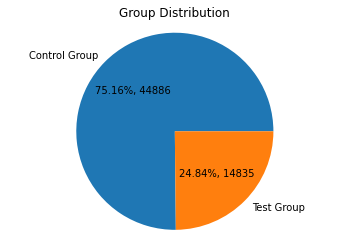

In [38]:
labels = ['Control Group', 'Test Group']
sizes = samples.groupby('test_group').size()
#print(f"Control Group Count: {control.size}, Test Group Size: {test.size}")
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f}')
ax.axis('equal')
plt.title('Group Distribution')
plt.show()

# 2. Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?

In [109]:
df = pd.merge(data,samples,how='left', on='sample_id')



cData = df.loc[(df['test_group'] == 0)]
tData = df.loc[(df['test_group'] == 1)]

cUserCount = len(cData.groupby('sample_id'))
tUserCount = len(tData.groupby('sample_id'))
totUserCount = len(df.groupby('sample_id'))
print(totUserCount)
print(cUserCount)
print(tUserCount)


#grouped = df.groupby(['test_group','sample_id'])#.size()
#print(grouped)
#print(grouped['test_group'] == 0))
#print(grouped.groups)

2714
1079
1635


In [101]:
totRebills = len(df.loc[(df['transaction_type'] == 'REBILL')].groupby('sample_id'))
print(totRebills)

cRebills = len(cData.loc[(cData['transaction_type'] == 'REBILL')].groupby('sample_id'))
print(cRebills)

tRebills = len(tData.loc[(tData['transaction_type'] == 'REBILL')].groupby('sample_id'))
print(tRebills)

2497
941
1556


In [110]:
print(totRebills/totUserCount)
print(cRebills/cUserCount)
print(tRebills/tUserCount)

0.9200442151805454
0.8721037998146431
0.9516819571865444


# 3. Is a user that must call-in to cancel more likely to generate more revenues?

In [102]:
cTotal = cData['transaction_amount'].sum() / cUserCount
print(cTotal)

tTotal = tData['transaction_amount'].sum() / tUserCount
print(tTotal)

83.26126042632065
58.36911314984709


# 4. Is a user that must call-in more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

In [107]:
totCharge = len(df.loc[(df['transaction_type'] == 'CHARGEBACK')]) / len(df.loc[(df['transaction_type'] == 'REBILL')])
print(totCharge)

cCharge = len(cData.loc[(cData['transaction_type'] == 'CHARGEBACK')]) / len(cData.loc[(cData['transaction_type'] == 'REBILL')])
print(cCharge)

tCharge = len(tData.loc[(tData['transaction_type'] == 'CHARGEBACK')]) / len(tData.loc[(tData['transaction_type'] == 'REBILL')])
print(tCharge)

0.023416175836805057
0.028221512247071354
0.017784711388455537
